[가이드](https://www.youtube.com/watch?v=TvfUjW0SEUI)

In [1]:
import nltk

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
from nltk.tokenize import sent_tokenize
text = '''Hello Mr, Jones, how are you doing today? The weather is great, and city is awesome.
The sky is bright-blue. you should't call for meeting today'''
tokenized_text = sent_tokenize(text)
print(tokenized_text)

['Hello Mr, Jones, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is bright-blue.', "you should't call for meeting today"]


In [11]:
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr', ',', 'Jones', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'bright-blue', '.', 'you', "should't", 'call', 'for', 'meeting', 'today']


In [12]:
## 빈도 모듈?
from nltk.probability import FreqDist
frequency = FreqDist(tokenized_word)
print(frequency)

<FreqDist with 24 samples and 32 outcomes>


In [13]:
# 사용된 빈도 오름차순 단어
frequency.most_common

<bound method Counter.most_common of FreqDist({',': 3, 'is': 3, 'you': 2, 'today': 2, 'The': 2, '.': 2, 'Hello': 1, 'Mr': 1, 'Jones': 1, 'how': 1, ...})>

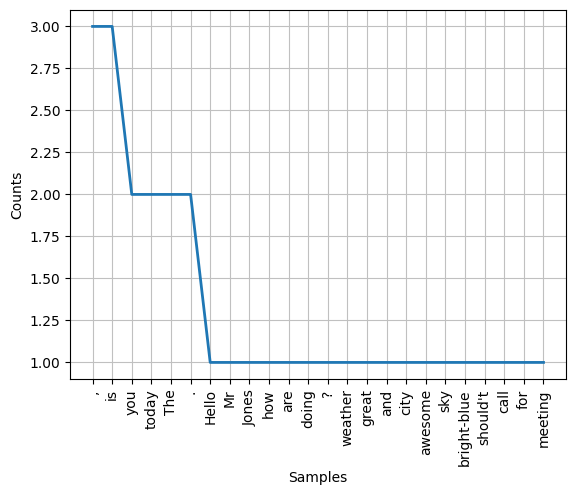

In [14]:
# 그래프
import matplotlib.pyplot as plt
frequency.plot(30, cumulative=False)
plt.show()

In [15]:
## 텍스트에서 사용되지 않은 단어도 있음 이걸 처리하기 위한 패키지
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'are', 'not', 'they', 'being', 'him', "shan't", 'or', 'o', 'will', 'doesn', 'can', 's', 'herself', 'all', "doesn't", 'for', 'were', 'off', 'only', 'there', 'have', 'other', "didn't", 'mightn', 'll', 'because', 'such', 'be', 'our', 'this', 'each', 'hers', 'now', 'hadn', 'yours', 'when', 'does', 'ma', 'wasn', 'myself', 'more', 'which', 'than', 'yourself', 'below', "that'll", "don't", 'to', 've', 'y', 'just', "you'll", 'me', 'don', 'mustn', 'haven', 'who', 'you', 'it', 'he', 'down', 'an', 'nor', 'no', 'am', 'had', 'into', 'on', 't', 'isn', 'theirs', 'and', 'ours', 'from', 'do', 'some', "couldn't", 'a', 'ain', 'ourselves', 'she', 'their', "you've", 'here', 'where', 'was', 'so', 'over', 'of', 'aren', 'what', 'most', 'these', 'didn', 'should', 'how', 'couldn', 'itself', 'why', 'any', 'my', 'd', "haven't", "needn't", 'between', "hadn't", 'shan', 'its', 'until', 'by', 'himself', 'needn', 'above', 'your', 'hasn', 'is', 'we', 'those', "mightn't", 'm', "you'd", "she's", 'been', 'once', 'own', 'v

In [16]:
filtered_sent = []
for w in tokenized_text:
    if w not in stop_words:
        filtered_sent.append(w)
print('Tokenized Sentence: ', tokenized_text)
print('Filtered Sentence: ', filtered_sent)

Tokenized Sentence:  ['Hello Mr, Jones, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is bright-blue.', "you should't call for meeting today"]
Filtered Sentence:  ['Hello Mr, Jones, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is bright-blue.', "you should't call for meeting today"]


In [17]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
stemmed_words = []

for w in filtered_sent:
    stemmed_words.append(ps.stem(w))
    
print('Filtered Sentence:', filtered_sent)
print('stemmed_words:', stemmed_words)

Filtered Sentence: ['Hello Mr, Jones, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is bright-blue.', "you should't call for meeting today"]
stemmed_words: ['hello mr, jones, how are you doing today?', 'the weather is great, and city is awesome.', 'the sky is bright-blue.', "you should't call for meeting today"]


In [25]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = 'working'
print('Lemmatized Word:', lem.lemmatize(word, 'v'))
print('Stemmed Word:', stem.stem(word))

word = 'Flying'
print('Lemmatized Word:', lem.lemmatize(word, 'v'))
print('Stemmed Word:', stem.stem(word))

word = 'dies'
print('Lemmatized Word:', lem.lemmatize(word, 'v'))
print('Stemmed Word:', stem.stem(word))

word = 'Starting'
print('Lemmatized Word:', lem.lemmatize(word, 'v'))
print('Stemmed Word:', stem.stem(word))

Lemmatized Word: work
Stemmed Word: work
Lemmatized Word: Flying
Stemmed Word: fli
Lemmatized Word: die
Stemmed Word: die
Lemmatized Word: Starting
Stemmed Word: start


In [26]:
sentence = 'Albert Einstein was born in Ulm, Germany in 1879'
tokens = nltk.word_tokenize(sentence)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879']


In [28]:
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD')]

# 공부 2. 워드클라우드까지
[가이드2](https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html)

In [30]:
# 말뭉치 자료 다운로드
import nltk
nltk.download("book", quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [31]:
# 말뭉치 샘플
# 저작권 말소된 문학작품 예시
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [32]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [34]:
# 토큰 생성
# 자연어 문서를 분석하기 위해 긴 문자열을 작은 단위로 나눠야 하는데, 이 때의 단위를 토큰이라 함
# 문장
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [35]:
# 단어
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [37]:
# 정규표현식
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

## 형태소 분석
- 형태소(morpheme)는 언어학에서 일정한 의미가 있는 가장 작은 말의 단위를 뜻한다. 보통 자연어 처리에서는 토큰으로 형태소를 이용한다. 형태소 분석(morphological analysis)이란 단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고 이를 이용하여 형태소를 찾아내거나 처리하는 작업이다. 형태소 분석의 예로는 다음과 같은 작업이 있다.

> 어간 추출(stemming)

> 원형 복원(lemmatizing)

> 품사 부착(Part-Of-Speech tagging)

### 어간 추출과 원형 복원
- 어간 추출(stemming)은 변화된 단어의 접미사나 어미를 제거하여 같은 의미를 가지는 형태소의 기본형을 찾는 방법이다. NLTK는 PorterStemmer LancasterStemmer 등을 제공한다. 어간 추출법은 단순히 어미를 제거할 뿐이므로 단어의 원형의 정확히 찾아주지는 않는다.

In [39]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 =  LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


- 원형 복원(lemmatizing)은 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업이다. 품사(part of speech)를 지정하는 경우 좀 더 정확한 원형을 찾을 수 있다.

In [40]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

### 품사 부착
품사(POS, part-of-speech)는 낱말을 문법적인 기능이나 형태, 뜻에 따라 구분한 것이다. 품사의 구분은 언어마다 그리고 학자마다 다르다. 예를 들어 NLTK에서는 펜 트리뱅크 태그세트(Penn Treebank Tagset)라는 것을 이용한다. 다음은 펜 트리뱅크 태그세트에서 사용하는 품사의 예이다.
> NNP: 단수 고유명사

> VB: 동사

> VBP: 동사 현재형

> TO: to 전치사

> NN: 명사(단수형 혹은 집합형)

> DT: 관형사

In [42]:
# 아래의 코드로 각 품사의 설명 확인 가능
nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


- pos_tag 명령을 사용하면 단어 토큰에 품사를 부착하여 튜플로 출력한다. 다음 예문에서 refuse, permit이라는 같은 철자의 단어가 각각 동사와 명사로 다르게 품사 부착된 것을 볼 수 있다.

In [43]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [44]:
# 특정 품사의 단어만 출력
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"]
nouns_list

['refuse', 'permit']

In [45]:
# 튜플 제거
from nltk.tag import untag
untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

- Scikit-Learn 등에서 자연어 분석을 할 때는 같은 토큰이라도 품사가 다르면 다른 토큰으로 처리해야 하는 경우가 많은데 이 때는 원래의 토큰과 품사를 붙여서 새로운 토큰 이름을 만들어 사용하면 철자가 같고 품사가 다른 단어를 구분할 수 있다.

In [46]:
def tokenizer(doc):
    return ["/".join(p) for p in tagged_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

### Text 클래스
- NLTK의 Text 클래스는 문서 분석에 유용한 여러가지 메서드를 제공한다. 토큰열을 입력하여 생성한다.

In [47]:
from nltk import Text

text = Text(retokenize.tokenize(emma_raw))

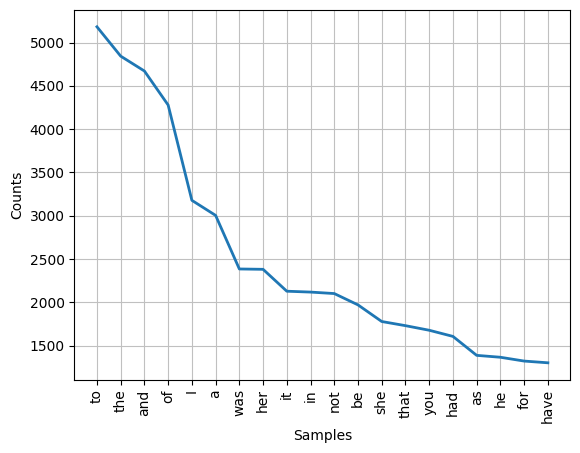

In [48]:
text.plot(20)
plt.show()

- dispersion_plot 메서드는 단어가 사용된 위치를 시각화한다. 소설 엠마의 각 등장인물에 대해 적용하면 다음과 같은 결과를 얻는다.

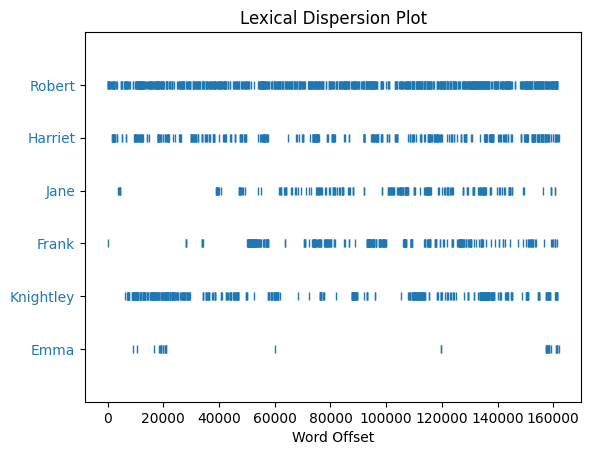

In [49]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

- concordance 메서드로 단어가 사용된 위치를 직접 표시하면 문맥(context)이 어떤지 볼 수 있다. 여기에서 문맥은 해당 단어의 앞과 뒤에 사용된 단어를 뜻한다.

In [50]:
text.concordance("Emma")

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [51]:
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [52]:
# 두 단어가 같이 사용된 문맥을 보기 위해
text.common_contexts(["Emma", "she"])

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


### FreqDist
- FreqDist 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다. Text 클래스의 vocab 메서드로 추출할 수 있다.

In [54]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

- 또는 다음처럼 토큰 리스트를 넣어서 직업 만들 수도 있다. 다음 코드에서는 Emma 말뭉치에서 사람의 이름만 모아서 FreqDist 클래스 객체를 만들었다. 품사 태그에서 NNP(고유대명사)이면서 필요없는 단어(stop words)는 제거하였다.

In [55]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

- FreqDist 클래스는 단어를 키(key), 출현빈도를 값(value)으로 가지는 사전 자료형과 유사하다. 다음 코드는 전체 단어의 수, “Emma”라는 단어의 출현 횟수, 확률을 각각 계산한다.

In [56]:
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

In [58]:
# 가장 빈도가 많은 단어
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

### 워드클라우드¶
- wordcloud 패키지를 사용하면 단어의 사용 빈도수에 따라 워드클라우드(Word Cloud) 시각화를 할 수 있다.

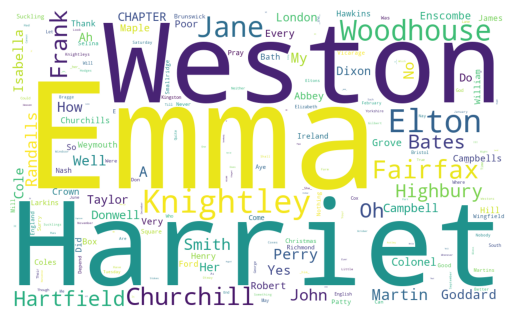

In [62]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()